In [2]:
import pandas as pd

bike_rentals = pd.read_csv("G:/bike_rental_hour.csv")
print(bike_rentals.head())

# Predicting the number of bikes rented in a given hour (predicting the 'cnt' column)

   instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1  


(array([ 6972.,  3705.,  2659.,  1660.,   987.,   663.,   369.,   188.,
          139.,    37.]),
 array([   1. ,   98.6,  196.2,  293.8,  391.4,  489. ,  586.6,  684.2,
         781.8,  879.4,  977. ]),
 <a list of 10 Patch objects>)

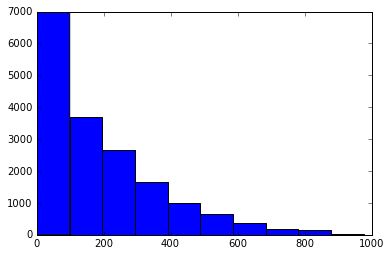

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

# Observing the distribution of total rentals
plt.hist(bike_rentals["cnt"])

In [4]:
# Using the correlation function to see how each column in the data is correlated to the "cnt" column
bike_rentals.corr()["cnt"]

instant       0.278379
season        0.178056
yr            0.250495
mnth          0.120638
hr            0.394071
holiday      -0.030927
weekday       0.026900
workingday    0.030284
weathersit   -0.142426
temp          0.404772
atemp         0.400929
hum          -0.322911
windspeed     0.093234
casual        0.694564
registered    0.972151
cnt           1.000000
Name: cnt, dtype: float64

In [9]:
# Create a new column in the data named "time_label" to determine what time of day the bike was rented 
# 4 - hours 0 to 6. 1 - hours 6 to 12. 2 - hours 12 to 18. 3 - hours 18 to 24

def assign_label(hour):
    if hour >=0 and hour < 6:
        return 4
    elif hour >=6 and hour < 12:
        return 1
    elif hour >= 12 and hour < 18:
        return 2
    elif hour >= 18 and hour <=24:
        return 3

bike_rentals["time_label"] = bike_rentals["hr"].apply(assign_label)
#print(bike_rentals['time_label'].head(15))

In [11]:
# Use 80% of the data to train and the rest to test

train = bike_rentals.sample(frac=.8)

test = bike_rentals.loc[~bike_rentals.index.isin(train.index)]

In [31]:
# First we make predictions using a linear regression model
from sklearn.linear_model import LinearRegression

predictors = list(train.columns)
predictors.remove("cnt")
predictors.remove("casual")
predictors.remove("registered")
predictors.remove("dteday")

reg = LinearRegression()

reg.fit(train[predictors], train["cnt"])

predictions_LR = reg.predict(test[predictors])

In [41]:
# Looking at the accuracy of the model. (Turns out to be poor)

from sklearn.metrics import r2_score, mean_squared_error

r2score_LR = r2_score(test["cnt"], predictions_LR)
print("R squared value:", r2score_LR)

mse_LR = mean_squared_error(test["cnt"], predictions_LR)
print("Mean square error:", mse_LR)

R squared value: 0.467497483931
Mean square error: 16998.3189727


In [42]:
# Use decision tree algorithm to improve the accuracy of the model

from sklearn.tree import DecisionTreeRegressor

reg = DecisionTreeRegressor(min_samples_leaf=5)

reg.fit(train[predictors], train["cnt"])

predictions_DT = reg.predict(test[predictors])

In [44]:
# Looking at the accuracy of the model (accuracy better than the Linear regression model)

r2score_DT = r2_score(test["cnt"], predictions_DT)
print("R squared value:", r2score_DT)

mse_DT = mean_squared_error(test["cnt"], predictions_DT)
print("Mean square error:", mse_DT)

R squared value: 0.906545626217
Mean square error: 2983.21079623


In [46]:
# Use random forest algorithm to further improve the accuracy 

from sklearn.ensemble import RandomForestRegressor

reg = RandomForestRegressor(min_samples_leaf=5)
reg.fit(train[predictors], train["cnt"])

predictions_RF = reg.predict(test[predictors])

In [48]:
# Looking at the accuracy of the model (accuracy even better than the decision tree algorithm)

r2score_RF = r2_score(test["cnt"], predictions_RF)
print("R squared value:", r2score_RF)

mse_RF = mean_squared_error(test["cnt"], predictions_RF)
print("Mean square error:", mse_RF)

R squared value: 0.932615154203
Mean square error: 2151.03040497
